In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns', 100) 


In [2]:
df = pd.read_csv("grading_data.csv")
df.head(3)

,ps_id,block,panchayat,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted average,overall grade,Districts
0,100,GIRIYAK,Pokharpur,24,4,2,36,290,290,0.43,0.54,0.50,0.72,0.59,0.67,0.29,1.00,0.43,0.45,C,Nalanda
1,101,DAGARUA,Rampur kochayli,30,4,2,30,40,40,0.64,0.55,0.75,0.59,0.60,0.67,0.48,0.75,0.57,0.60,B,Purnea
2,102,DAGARUA,Harkheli,24,3,1,48,60,40,0.89,0.64,0.75,0.75,0.69,0.50,0.71,0.50,0.70,0.67,B,Purnea


In [3]:
df.shape

(200, 21)

In [4]:
df["Category"] = df.category.replace({1:"SC", 2:"ST",3:"OBC",4:"EBC",5:"GEN",6:"others"})

In [5]:
df["Education"] = df.education.replace({1:"8th",2:"10th",3:"12th",4:"Graduate",5:"Post graduate"})

In [6]:
from sklearn.preprocessing import LabelEncoder 
le =LabelEncoder()

In [57]:
dfle = df
dfle['overall grades'] = le.fit_transform(dfle['overall grade'])
dfle['districts'] = le.fit_transform(dfle['Districts'])
dfle.head(5)

,ps_id,block,panchayat,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted average,overall grade,Districts,Category,Education,overall grades,districts
0,100,GIRIYAK,Pokharpur,24,4,2,36,290,290,0.43,0.54,0.50,0.72,0.59,0.67,0.29,1.00,0.43,0.45,C,Nalanda,EBC,10th,2,3
1,101,DAGARUA,Rampur kochayli,30,4,2,30,40,40,0.64,0.55,0.75,0.59,0.60,0.67,0.48,0.75,0.57,0.60,B,Purnea,EBC,10th,1,5
2,102,DAGARUA,Harkheli,24,3,1,48,60,40,0.89,0.64,0.75,0.75,0.69,0.50,0.71,0.50,0.70,0.67,B,Purnea,OBC,8th,1,5
3,103,SAKRA,Bharti pur,30,1,1,56,375,375,0.57,0.61,0.25,0.76,0.60,0.67,0.34,1.00,0.52,0.58,C,Muzaffarpur,SC,8th,2,2
4,104,WAZIRGANG,Sahiya,27,1,3,36,95,40,0.54,0.46,0.75,0.64,0.56,0.50,0.87,1.00,0.70,0.67,B,Gaya,SC,12th,1,1


In [8]:
dfle.describe()

,ps_id,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted average,overall grades,districts
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,199.500000,30.690000,1.880000,2.030000,69.705000,160.280000,129.975000,0.506600,0.500400,0.447500,0.547750,0.506650,0.611150,0.557750,0.902500,0.555850,0.579050,1.520000,2.850000
std,57.879185,6.502717,1.136688,1.026826,289.651424,86.551472,77.793338,0.157041,0.166507,0.226385,0.181801,0.146816,0.162729,0.214337,0.203286,0.122582,0.103101,0.782728,1.718215
min,100.000000,19.000000,1.000000,1.000000,3.000000,30.000000,20.000000,0.070000,0.110000,0.000000,0.030000,0.110000,0.330000,0.130000,0.000000,0.200000,0.260000,0.000000,0.000000
25%,149.750000,26.000000,1.000000,1.000000,36.000000,109.500000,40.000000,0.397500,0.380000,0.250000,0.427500,0.417500,0.500000,0.390000,1.000000,0.480000,0.517500,1.000000,2.000000
50%,199.500000,30.000000,1.000000,2.000000,40.000000,120.000000,120.000000,0.520000,0.500000,0.500000,0.550000,0.515000,0.670000,0.520000,1.000000,0.570000,0.585000,2.000000,2.000000
75%,249.250000,35.000000,3.000000,3.000000,48.000000,232.500000,198.500000,0.620000,0.630000,0.500000,0.662500,0.600000,0.670000,0.720000,1.000000,0.650000,0.650000,2.000000,5.000000
max,299.000000,62.000000,5.000000,4.000000,3637.000000,450.000000,375.000000,0.890000,0.890000,1.000000,1.000000,0.900000,1.000000,0.950000,1.000000,0.850000,0.820000,3.000000,6.000000


In [9]:
correlation = round(dfle.corr(),2)

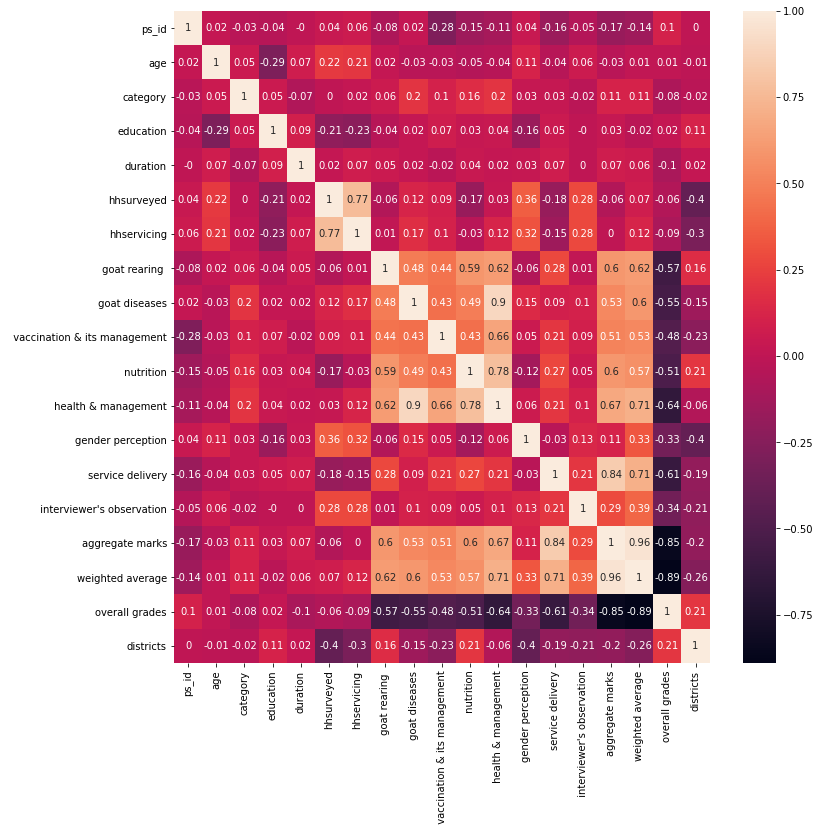

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot =True)
plt.savefig("cor.pdf")

In [11]:
##sns.pairplot(df)

C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


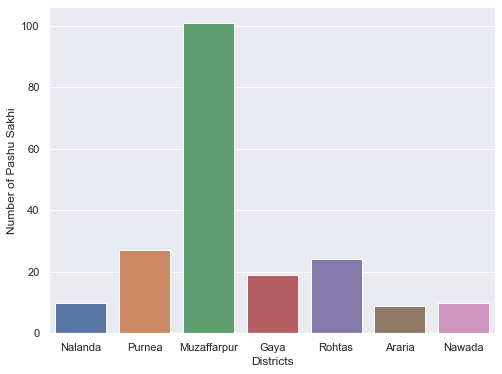

In [12]:
## number of pashu sakhi sampled from every district
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(dfle["Districts"])
plt.xlabel('Districts')
plt.ylabel('Number of Pashu Sakhi')
plt.savefig("number.pdf")

C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


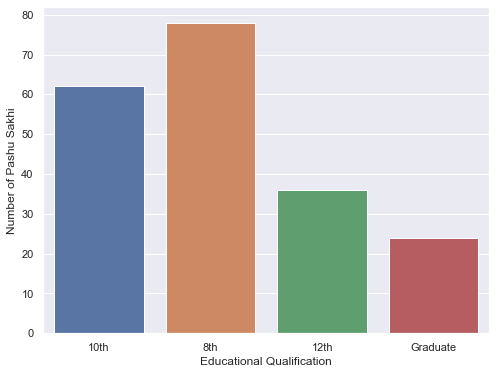

In [13]:
## Educational profile of the pashu sakhi 
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(dfle["Education"])
plt.xlabel('Educational Qualification')
plt.ylabel('Number of Pashu Sakhi')
plt.savefig("education.pdf")

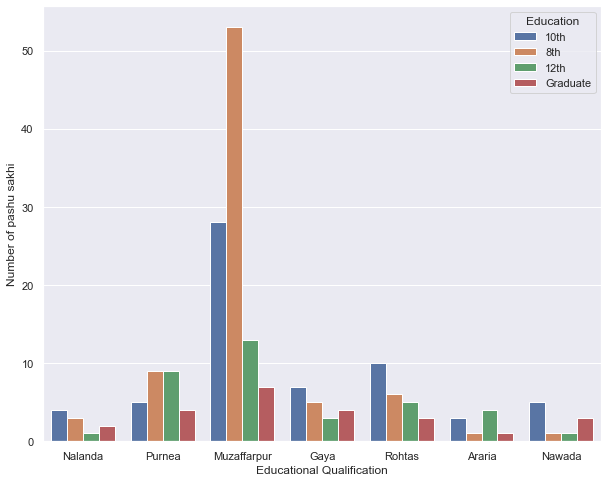

In [14]:
## Break up of educational qualification 
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x="Districts", hue="Education", data=dfle)
plt.xlabel("Educational Qualification")
plt.ylabel("Number of pashu sakhi")
plt.savefig("district.pdf")

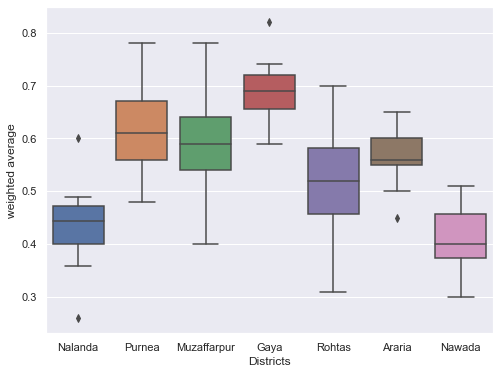

In [15]:
## Comparison of distribution of marks scored by pashu sakhis in every districts 
## We can see the difference among the districbution of performances of pashu sakhi across the districts 
plt.figure(figsize=(8,6))
sns.boxplot(x=dfle['Districts'], y=dfle['weighted average'])
plt.savefig("score.pdf")

In [16]:
## ANOVA test on districts as an independent variable 

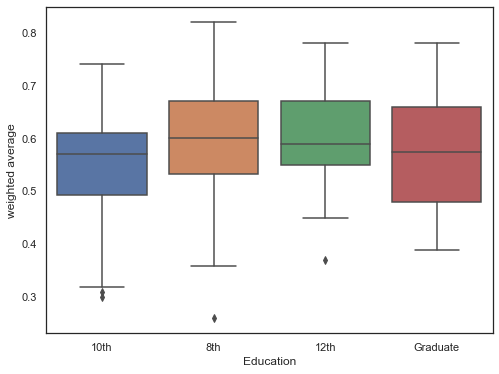

In [17]:
## comparison of distribution of weighted average marks scored according to educational qualification 
plt.figure(figsize=(8,6))
sns.set_theme(style="white", palette=None)
sns.boxplot(x=dfle['Education'],y=dfle['weighted average'])
plt.savefig("marks.pdf")

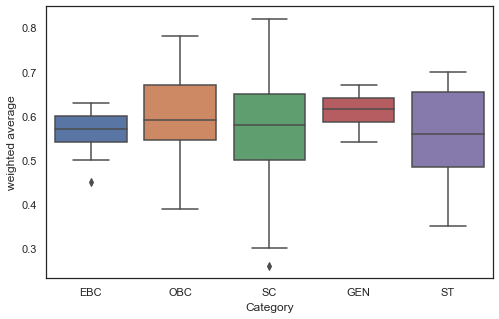

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x=dfle['Category'], y=dfle['weighted average'])
plt.savefig("category.pdf")

In [19]:
## anova test on education as an independent variable 

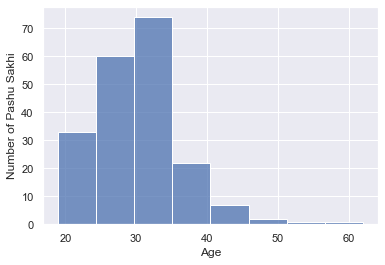

In [20]:
## distribution of the age of the pashu sakhis who were part of the study 
sns.set_theme(style="darkgrid")
sns.histplot(dfle["age"],bins=8)
plt.xlabel("Age")
plt.ylabel("Number of Pashu Sakhi")
plt.savefig("age.pdf")

C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


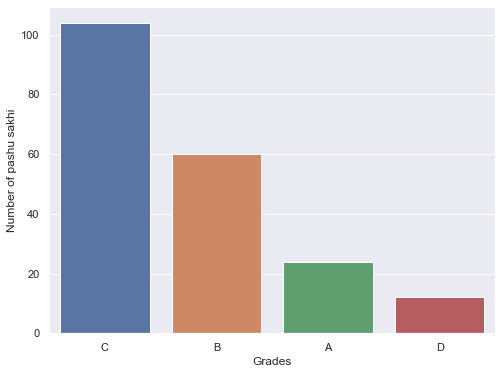

In [21]:
## count of pashu sakhi according to their grades
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(dfle["overall grade"])
plt.xlabel('Grades')
plt.ylabel('Number of pashu sakhi')
plt.savefig("gradescount.pdf")

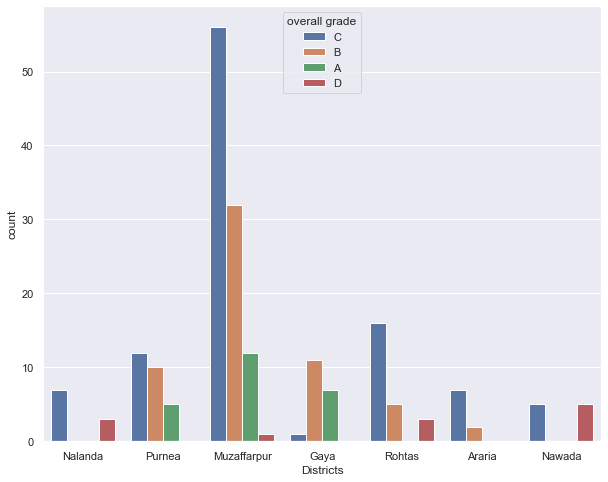

In [22]:
## pashu sakhi according to their grades in different districts
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x="Districts", hue="overall grade", data=dfle)
plt.savefig("gradecountdistrictwise.pdf")

In [23]:
## use of cross tab to look at the relationship between overall grade and educational attainment 
cf = pd.crosstab(dfle["Education"],dfle["overall grade"])
cf

overall grade,A,B,C,D
Education,,,,
10th,5,14,36,7
12th,4,13,18,1
8th,10,28,38,2
Graduate,5,5,12,2


In [24]:
df.groupby(["Districts","Education","overall grade"]).size().unstack().fillna(0)

overall grade            A     B     C    D
Districts   Education                      
Araria      10th       0.0   1.0   2.0  0.0
            12th       0.0   0.0   4.0  0.0
            8th        0.0   1.0   0.0  0.0
            Graduate   0.0   0.0   1.0  0.0
Gaya        10th       3.0   3.0   1.0  0.0
            12th       1.0   2.0   0.0  0.0
            8th        1.0   4.0   0.0  0.0
            Graduate   2.0   2.0   0.0  0.0
Muzaffarpur 10th       1.0   8.0  18.0  1.0
            12th       2.0   6.0   5.0  0.0
            8th        8.0  16.0  29.0  0.0
            Graduate   1.0   2.0   4.0  0.0
Nalanda     10th       0.0   0.0   3.0  1.0
            12th       0.0   0.0   1.0  0.0
            8th        0.0   0.0   1.0  2.0
            Graduate   0.0   0.0   2.0  0.0
Nawada      10th       0.0   0.0   3.0  2.0
            12th       0.0   0.0   0.0  1.0
            8th        0.0   0.0   1.0  0.0
            Graduate   0.0   0.0   1.0  2.0
Purnea      10th       1.0   1.0   3.0  0.0
            12th       1.0   3.0   5.0  0.0
            8th        1.0   5.0   3.0  0.0
            Graduate   2.0   1.0   1.0  0.0
Rohtas      10th       0.0   1.0   6.0  3.0
            12th       0.0   2.0   3.0  0.0
            8th        0.0   2.0   4.0  0.0
            Graduate   0.0   0.0   3.0  0.0

In [25]:
dfle["districts"].unique()

array([3, 5, 2, 1, 6, 0, 4])

In [26]:
## detailed analysis of purnea district
pf = dfle[dfle.districts == 5]                     ## Purnea
zf = dfle[dfle.districts==2]                       ## Muzaffarpur 
nf =  dfle[dfle.districts==3]                      ## Nalanda
rf =   dfle[dfle.districts==6]                     ## Rohtas
gf =  dfle[dfle.districts==1]                      ## Gaya
na =  dfle[dfle.districts==0]                      ## Araria
pf.head(3)

,ps_id,block,panchayat,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted average,overall grade,Districts,Category,Education,overall grades,districts
1,101,DAGARUA,Rampur kochayli,30,4,2,30,40,40,0.64,0.55,0.75,0.59,0.60,0.67,0.48,0.75,0.57,0.60,B,Purnea,EBC,10th,1,5
2,102,DAGARUA,Harkheli,24,3,1,48,60,40,0.89,0.64,0.75,0.75,0.69,0.50,0.71,0.50,0.70,0.67,B,Purnea,OBC,8th,1,5
5,105,DAGARUA,Rampur kochaili dagarua,24,3,1,18,40,40,0.71,0.63,0.75,1.00,0.76,0.33,0.69,1.00,0.71,0.67,B,Purnea,OBC,8th,1,5


Text(0, 0.5, 'Number Of Pashu Sakhi')

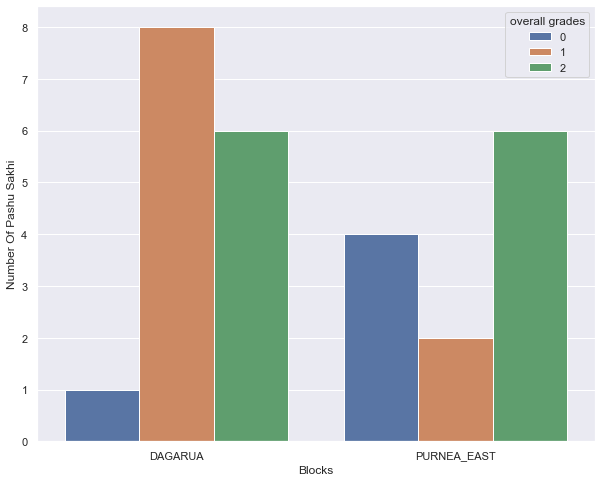

In [27]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x="block", hue="overall grades", data=pf)
plt.xlabel("Blocks")
plt.ylabel("Number Of Pashu Sakhi")

In [28]:
pf["block"].unique()

array(['DAGARUA', 'PURNEA_EAST'], dtype=object)

In [29]:
## Hypothesis testing 

In [30]:
rf.head()

,ps_id,block,panchayat,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted average,overall grade,Districts,Category,Education,overall grades,districts
13,113,BIKRAMGANJ,Khayara Bhudhar,30,3,1,47,141,141,0.53,0.23,0.50,0.71,0.42,0.67,0.20,1.00,0.40,0.49,C,Rohtas,OBC,8th,2,6
17,117,AKHORIGOLA,Chandi,32,1,1,36,120,120,0.54,0.32,0.25,0.67,0.42,0.83,0.83,1.00,0.66,0.68,B,Rohtas,SC,8th,1,6
35,135,BIKRAMGANJ,Jamori,40,1,3,2017,120,150,0.53,0.38,0.25,0.58,0.42,0.33,0.83,0.75,0.61,0.55,C,Rohtas,SC,12th,2,6
50,150,AKHORIGOLA,Tetrar,25,1,2,36,40,40,0.43,0.27,0.00,0.56,0.32,0.50,0.38,1.00,0.41,0.45,C,Rohtas,SC,10th,2,6
51,151,BIKRAMGANJ,Mohani,25,1,2,48,120,120,0.59,0.46,0.00,0.62,0.44,0.33,0.86,1.00,0.65,0.60,B,Rohtas,SC,10th,1,6


In [31]:
## testing the hypothesis 
## mean of atleast one distict is different from other 
meanP = pf["weighted average"].mean()
meanZ= zf["weighted average"].mean()
meanN = nf["weighted average"].mean()
meanR = nf["weighted average"].mean()
meanA = gf["weighted average"].mean()
meanG = rf["weighted average"].mean()


In [32]:
means = [meanP,meanZ,meanN,meanR,meanA,meanG]
means

[0.6233333333333335,
 0.5935643564356439,
 0.43500000000000005,
 0.43500000000000005,
 0.6894736842105263,
 0.5175]

In [33]:
import scipy.stats as stats 
from statsmodels.formula.api import ols
import statsmodels.api as sm 

In [34]:
model = ols('age~districts', data = dfle).fit()

In [35]:
annova_result = sm.stats.anova_lm(model,typ=1)
print(annova_result)

              df       sum_sq    mean_sq        F    PR(>F)
districts    1.0     1.089515   1.089515  0.02564  0.872947
Residual   198.0  8413.690485  42.493386      NaN       NaN


In [36]:
stats.f_oneway(dfle["age"],dfle["districts"])

F_onewayResult(statistic=3426.644236793346, pvalue=1.16566655093739e-197)

In [63]:
dfle = dfle.rename(columns={'weighted average': 'weighted_average'})
dfle.head(3)

,ps_id,block,panchayat,age,category,education,duration,hhsurveyed,hhservicing,goat rearing,goat diseases,vaccination & its management,nutrition,health & management,gender perception,service delivery,interviewer's observation,aggregate marks,weighted_average,overall grade,Districts,Category,Education,overall grades,districts
0,100,GIRIYAK,Pokharpur,24,4,2,36,290,290,0.43,0.54,0.50,0.72,0.59,0.67,0.29,1.00,0.43,0.45,C,Nalanda,EBC,10th,2,3
1,101,DAGARUA,Rampur kochayli,30,4,2,30,40,40,0.64,0.55,0.75,0.59,0.60,0.67,0.48,0.75,0.57,0.60,B,Purnea,EBC,10th,1,5
2,102,DAGARUA,Harkheli,24,3,1,48,60,40,0.89,0.64,0.75,0.75,0.69,0.50,0.71,0.50,0.70,0.67,B,Purnea,OBC,8th,1,5


In [64]:
stats.f_oneway(dfle['weighted_average'],dfle['districts'])
## F Statistic is really high and Pvalue is very small(due to e raise to the power negative number ) so we can conclude
## that the mean of weighted average differs across the districts

F_onewayResult(statistic=348.12038719339967, pvalue=2.8430972062163543e-56)

In [39]:
model = ols('weighted_average~districts', data = dfle).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)
## Here p value is significant(less than 0.05)hence mean of atleast one of the district is different from other 

            sum_sq     df          F    PR(>F)
districts  0.13844    1.0  13.865824  0.000256
Residual   1.97688  198.0        NaN       NaN


In [40]:
import scipy.stats as stats
stats.shapiro(model.resid)
## Null hypothesis: data is drawn from normal distribution.
## the test indicates that the output is nonsiginficant hence weighted average score is normally distributed 
## As P value is large we fail to reject the null hypthesis and assume that residuals are normally distributed 

ShapiroResult(statistic=0.9921023845672607, pvalue=0.35296544432640076)

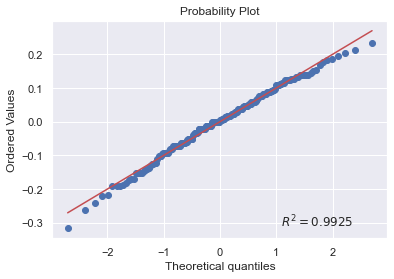

In [41]:
stat = stats.probplot(model.resid, plot= plt, rvalue= True)
## it is reasonable to assume that assumption of normality was met 
## As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

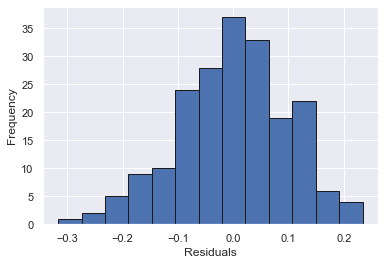

In [42]:
plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [43]:
## Null hypothesis - weighted average has equal variance
from scipy.stats import levene
stat, p = levene(pf["weighted average"],zf["weighted average"],nf["weighted average"],na["weighted average"])
print(p)
## P value is too high hence we cant reject the null hypothesis 

0.7189998488872775


In [44]:
## perform post-hoc test 
## to know which one of the pairs in the group is causing the significant result 

In [45]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [46]:
import bioinfokit

In [47]:
from bioinfokit.analys import stat
res = stat()

In [52]:
##res.tukey_hsd(df=dfle, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
##res.tukey_summary

C:\Users\hp\anaconda3\anaconda\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Araria,Gaya,0.125,0.0026,0.0293,0.2208,True
Araria,Muzaffarpur,0.0291,0.9,-0.0532,0.1114,False
Araria,Nalanda,-0.1294,0.0087,-0.2381,-0.0208,True
Araria,Nawada,-0.1564,0.001,-0.2651,-0.0478,True
Araria,Purnea,0.0589,0.4666,-0.0322,0.1499,False
Araria,Rohtas,-0.0469,0.7099,-0.1394,0.0455,False
Gaya,Muzaffarpur,-0.0959,0.001,-0.1551,-0.0368,True
Gaya,Nalanda,-0.2545,0.001,-0.3469,-0.1621,True
Gaya,Nawada,-0.2815,0.001,-0.3739,-0.1891,True
Gaya,Purnea,-0.0661,0.0848,-0.137,0.0047,False


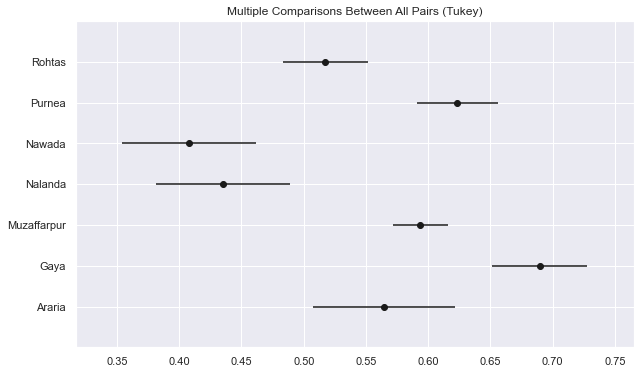

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog =dfle["weighted_average"],groups = dfle["Districts"],alpha = 0.05 )
##plt.vlines(x=0.65,ymin= -0.5, ymax=4.5,color="red")
tukey.plot_simultaneous()
tukey.summary()
##plt.savefig("an.pdf")

In [ ]:
## check the hypothesis if education has any impact on mean weighted score 

In [51]:
model = ols('weighted_average~Education', data = dfle).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)
## As p value is very less hence the result is significant 

             sum_sq     df         F    PR(>F)
Education  0.099093    3.0  3.210993  0.024114
Residual   2.016226  196.0       NaN       NaN


In [65]:
stats.f_oneway(dfle['weighted_average'],dfle['education'])
## F statistics is large and pvalue is small 

F_onewayResult(statistic=395.35262511777825, pvalue=1.3640342536437278e-61)

In [ ]:
## Tukey test to see which pair has caused such a small P value 

C:\Users\hp\anaconda3\anaconda\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
10th,12th,0.0523,0.0697,-0.0028,0.1073,False
10th,8th,0.0483,0.0288,0.0035,0.093,True
10th,Graduate,0.0351,0.4782,-0.0281,0.0982,False
12th,8th,-0.004,0.9,-0.057,0.0489,False
12th,Graduate,-0.0172,0.9,-0.0865,0.052,False
8th,Graduate,-0.0132,0.9,-0.0746,0.0481,False


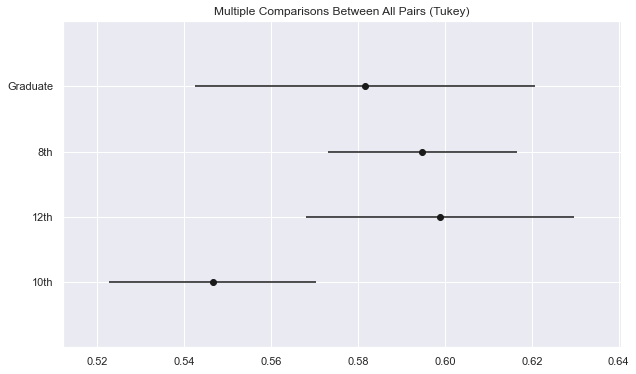

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog =dfle["weighted_average"],groups = dfle["Education"],alpha = 0.05 )
tukey.plot_simultaneous()
tukey.summary()

In [ ]:
## graduates have not scored significantly higher than those who have studied till class 8th 

In [58]:
## checking for the impact of category on weighted_average 

In [67]:
model = ols('weighted_average~category', data = dfle).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)
## The impact of category on weighted average score is not statistically significant as p value is large (greater than 0.05)

            sum_sq     df         F    PR(>F)
category  0.025832    1.0  2.447856  0.119282
Residual  2.089487  198.0       NaN       NaN
